Mahesh Rajan S
# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## **Importing Necessary Libraries**

In [84]:
# Import essential libraries for data manipulation and analysis
#for reading and handling the data
import pandas as pd
import numpy as np
import os

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#model building
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [73]:
# Importing the file porter_data_1.csv
df=pd.read_csv("porter_data_1.csv")

In [74]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [75]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [76]:
# Convert categorical features to category type
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [77]:
# Calculate time taken in minutes
df['time_taken']=df['actual_delivery_time'] - df['created_at']
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [78]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

df['is_weekend'] = df['day'].apply(lambda x: '1' if x in [5, 6] else '0')
df['is_weekend'] = df['is_weekend'].astype('int')

In [79]:
# Drop unnecessary columns
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [80]:
# Define target variable (y) and features (X)
X = df # Features
y = df['time_taken_mins'] # Target variable


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [81]:
# Split data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [82]:
# Define numerical and categorical columns for easy EDA and data manipulation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   store_primary_category    175777 non-null  int8   
 2   order_protocol            175777 non-null  float64
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken_mins           175777 non-null  float64
 13  hour                      175777 non-null  i

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

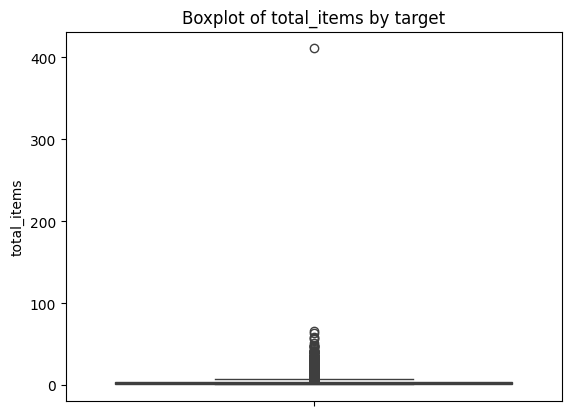

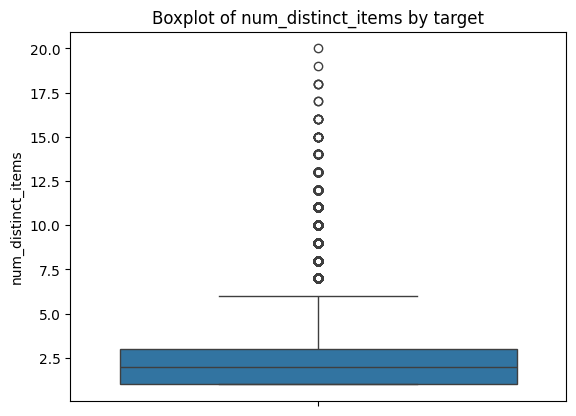

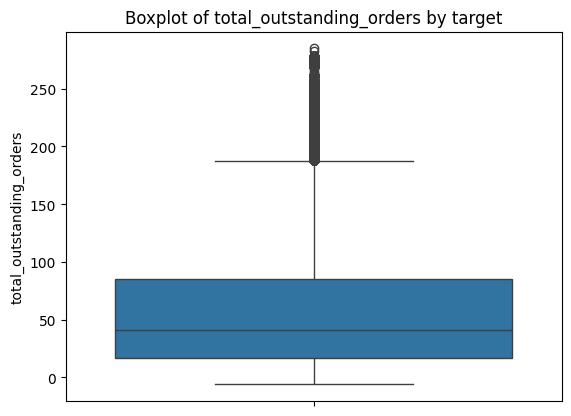

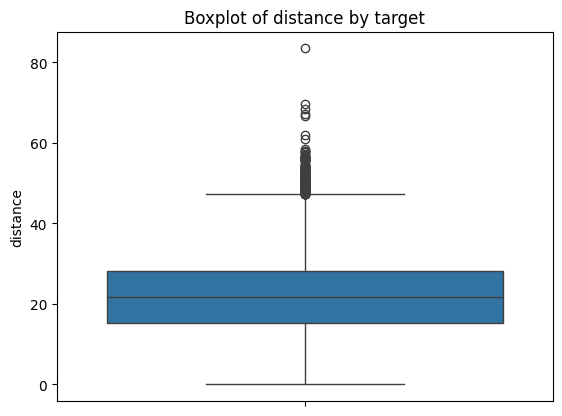

In [83]:
# Plot distributions for all numerical columns

num_col=['total_items', 'num_distinct_items', 'total_outstanding_orders', 'distance']
for col in num_col:
  sns.boxplot(data=df[col])
  plt.title(f'Boxplot of {col} by target')
  plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



In [ ]:
# Show the distribution of time_taken for different hours



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   store_primary_category    175777 non-null  int8   
 2   order_protocol            175777 non-null  float64
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken_mins           175777 non-null  float64
 13  hour                      175777 non-null  i

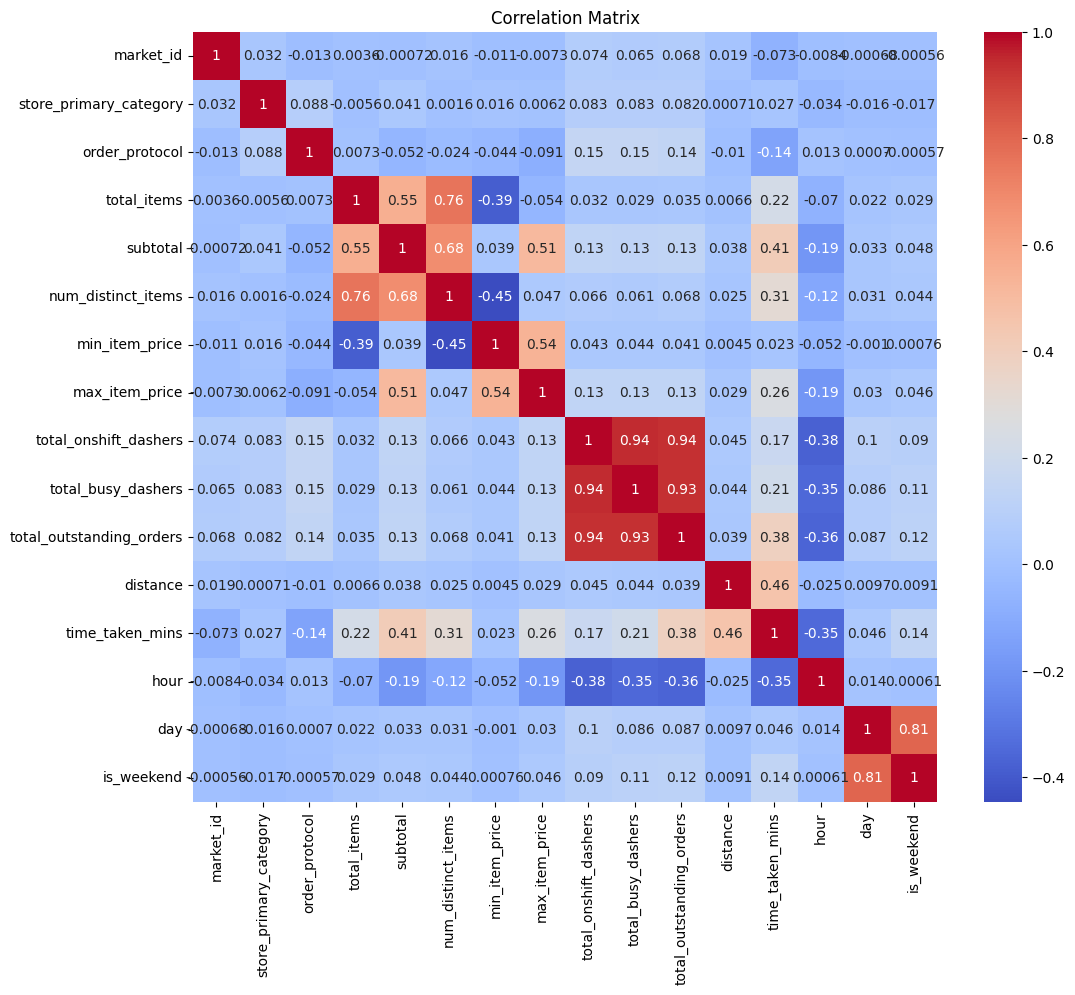

distance                    0.460173
subtotal                    0.413267
total_outstanding_orders    0.384999
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
is_weekend                  0.136414
day                         0.045878
store_primary_category      0.026973
min_item_price              0.022753
market_id                  -0.073016
order_protocol             -0.136755
hour                       -0.346366
Name: time_taken_mins, dtype: float64


In [71]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

corr_values = df.corr()['time_taken_mins'].drop('time_taken_mins')

print(corr_values.sort_values(ascending=False))

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [89]:
# Boxplot for time_taken

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   store_primary_category    175777 non-null  int8   
 2   order_protocol            175777 non-null  float64
 3   total_items               175777 non-null  int64  
 4   subtotal                  175777 non-null  int64  
 5   num_distinct_items        175777 non-null  int64  
 6   min_item_price            175777 non-null  int64  
 7   max_item_price            175777 non-null  int64  
 8   total_onshift_dashers     175777 non-null  float64
 9   total_busy_dashers        175777 non-null  float64
 10  total_outstanding_orders  175777 non-null  float64
 11  distance                  175777 non-null  float64
 12  time_taken_mins           175777 non-null  float64
 13  hour                      175777 non-null  i

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

Empty DataFrame
Columns: [market_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, distance, time_taken_mins, hour, day, is_weekend]
Index: []
Empty DataFrame
Columns: [market_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, distance, time_taken_mins, hour, day, is_weekend]
Index: []
Empty DataFrame
Columns: [market_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, distance, time_taken_mins, hour, day, is_weekend]
Index: []


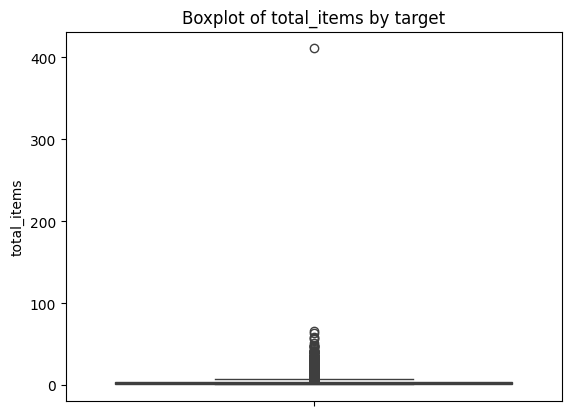

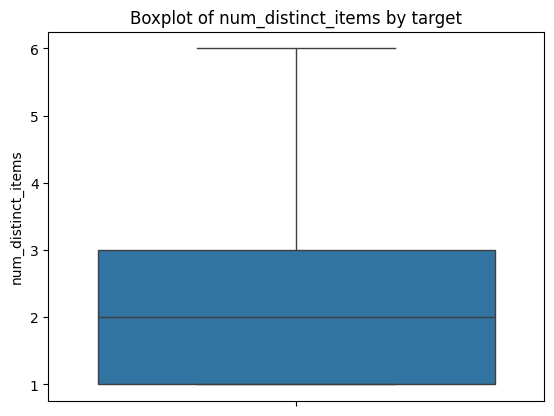

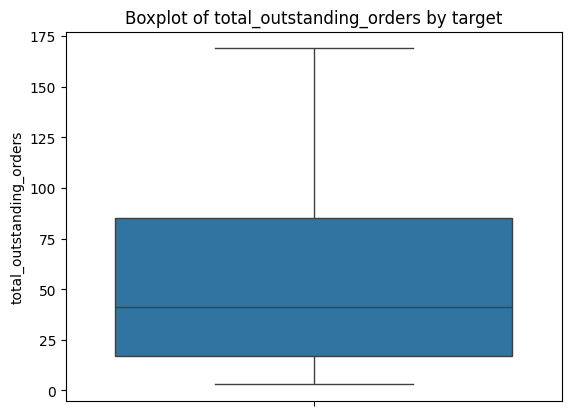

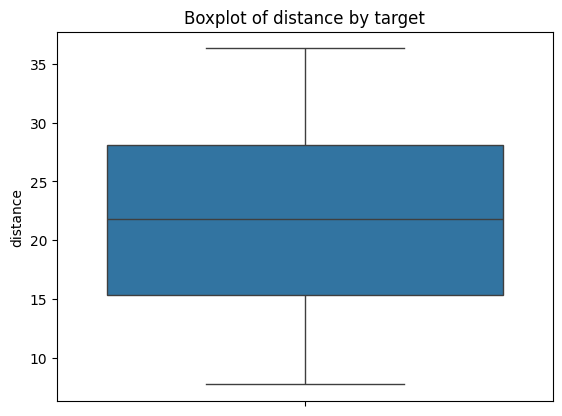

In [88]:
# Handle outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print(detect_outliers_iqr(df, 'distance'))
print(detect_outliers_iqr(df, 'total_outstanding_orders'))
print(detect_outliers_iqr(df, 'num_distinct_items'))

def winsorize(df, column, lower=0.05, upper=0.95):
    lower_bound = df[column].quantile(lower)
    upper_bound = df[column].quantile(upper)
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Clip outliers in 'distance'
df = winsorize(df, 'distance')
df = winsorize(df, 'total_outstanding_orders')
df = winsorize(df, 'num_distinct_items')

num_col=['total_items', 'num_distinct_items', 'total_outstanding_orders', 'distance']
for col in num_col:
  sns.boxplot(data=df[col])
  plt.title(f'Boxplot of {col} by target')
  plt.show()

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [91]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

X = df.drop(['min_item_price', 'max_item_price','order_protocol', 'time_taken_mins'], axis=1) # Features
y = df['time_taken_mins'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Train the model using the training data


In [92]:
# Make predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.8428418413135472
Mean Squared Error: 15.518075258355244
R-squared: 0.8223349206028965


In [ ]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [93]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Feature ranking (1 is best)
print(pd.DataFrame({
    'feature': X_train.columns,
    'rank': rfe.ranking_
}).sort_values('rank'))

                     feature  rank
11                is_weekend     1
4         num_distinct_items     2
0                  market_id     3
8                   distance     4
5      total_onshift_dashers     5
7   total_outstanding_orders     6
9                       hour     7
10                       day     8
6         total_busy_dashers     9
2                total_items    10
3                   subtotal    11
1     store_primary_category    12


In [116]:
X1 = df.drop(['store_primary_category',  'min_item_price', 'max_item_price','order_protocol', 'time_taken_mins'], axis=1) # Features
y = df['time_taken_mins'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Feature ranking (1 is best)
print(pd.DataFrame({
    'feature': X_train.columns,
    'rank': rfe.ranking_
}).sort_values('rank'))

                     feature  rank
10                is_weekend     1
3         num_distinct_items     2
0                  market_id     3
7                   distance     4
4      total_onshift_dashers     5
6   total_outstanding_orders     6
8                       hour     7
9                        day     8
5         total_busy_dashers     9
1                total_items    10
2                   subtotal    11


In [118]:
# Build the final model with selected number of features

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.842910170924171
Mean Squared Error: 15.518787292464014
R-squared: 0.822326768586982


Tried removing more variables but the accuracy went down

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
 Yes there is. The store primary category is a categorical variable and it doesnt have significant impact on the time but it does affect it to some extent.
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
It means that we are allocating 20% of our dataset for testing and validating the model. The remaining 80% is to train the model.
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
Based on the heatmap, distance has the maximum correlation with the target variable
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
I used IQR Inter quartile range to detect the outliers. I handled them by using IQR clipping. Though it shpuldnt be that effective for this dataset, it sustains the data size and the model fit is good overall. So I believe its a good way to do this.

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Three major factors are whether its in weekend, time of order and finally distance.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>When you have a continuous data pertaining to any field or domain, we can estimate any of the variables by building a model and training it with the continuous data that we have. This is Linear regression




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**Linear regression helps establish the relationship between one dependent and one independant variable whereas multiple regression helps establish the relationship between one de[pendant variable and multiple independant variables.
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function it quantifies how well—or how poorly—the model’s predictions match the actual data. Specifically, it measures the total error between the predicted values and the actual values, aggregating the errors for all data points into a single real number
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Over fitting is when the model is too complex where it learns the errors as well, whereas underfitting refers to a very sim ple model where the model fails to learn crucial datapoints too.

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are a critical diagnostic tool for assessing the quality and appropriateness of a linear regression model. They help by visually revealing patterns in the model’s errors (residuals), which are the differences between the observed values and the values predicted by the model